# *載入所需要套件*
adam實作

In [0]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
np.random.seed(10)

載入mnist資料集

In [0]:
from keras.datasets import mnist

*讀取資料集*

In [0]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

將特徵做Reshape轉換

In [0]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

將特徵標準化

In [0]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

將數字以oneHotEncoding轉換

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_test_label = np_utils.to_categorical(y_test_label)

建立Sequential()模型

In [0]:
model = Sequential()

建立輸入層隱藏層

In [0]:
model.add(Dense(units = 16,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

建立輸出層

In [0]:
model.add(Dense(units = 10,
                kernel_initializer = 'normal',
                activation = 'softmax'))

# 進行訓練

In [0]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',metrics = ['accuracy'])

執行訓練程式

In [19]:
train_history = model.fit(x= x_Train_normalize,
                          y=y_Train_OneHot,validation_split = 0.2,
                          epochs = 10,batch_size = 200,verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 1.0488 - accuracy: 0.7217 - val_loss: 0.4315 - val_accuracy: 0.8878
Epoch 2/10
 - 1s - loss: 0.3821 - accuracy: 0.8948 - val_loss: 0.3127 - val_accuracy: 0.9127
Epoch 3/10
 - 1s - loss: 0.3137 - accuracy: 0.9112 - val_loss: 0.2841 - val_accuracy: 0.9172
Epoch 4/10
 - 1s - loss: 0.2852 - accuracy: 0.9190 - val_loss: 0.2612 - val_accuracy: 0.9262
Epoch 5/10
 - 1s - loss: 0.2649 - accuracy: 0.9241 - val_loss: 0.2477 - val_accuracy: 0.9294
Epoch 6/10
 - 1s - loss: 0.2489 - accuracy: 0.9289 - val_loss: 0.2347 - val_accuracy: 0.9333
Epoch 7/10
 - 1s - loss: 0.2352 - accuracy: 0.9320 - val_loss: 0.2255 - val_accuracy: 0.9344
Epoch 8/10
 - 1s - loss: 0.2234 - accuracy: 0.9354 - val_loss: 0.2187 - val_accuracy: 0.9373
Epoch 9/10
 - 1s - loss: 0.2132 - accuracy: 0.9381 - val_loss: 0.2093 - val_accuracy: 0.9401
Epoch 10/10
 - 1s - loss: 0.2046 - accuracy: 0.9407 - val_loss: 0.2042 - val_accuracy: 0.9417


建立繪圖函示

In [0]:
def show_train_history(train_history, train, validation):

    plt.plot(train_history.history[train])

    plt.plot(train_history.history[validation])

    plt.title('Train History')

    plt.ylabel(train)

    plt.xlabel('Epoch')

    plt.legend(['train', 'validation'], loc='center right')

    plt.show()

顯示訓練成果

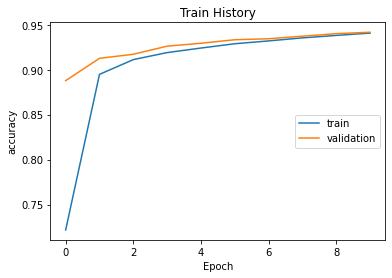

In [21]:
show_train_history(train_history,'accuracy','val_accuracy')

顯示訓練損失

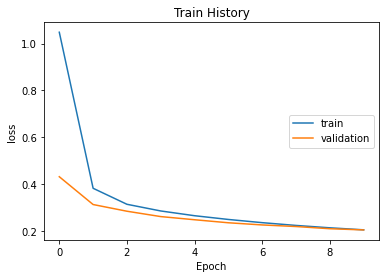

In [22]:
show_train_history(train_history,'loss','val_loss')